# EDA of Netflix Content Engagement

In [24]:
import pandas as pd
import numpy as np

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic") # 경로 설정
import matplotlib.colors as mcolors


df = pd.read_csv('../data/total_netflix_2023 new.csv')
print(df.shape)
df.head()

(18332, 9)


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."


## 1. Data Proprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                18332 non-null  object
 1   Available Globally?  18332 non-null  object
 2   Release Date         18332 non-null  object
 3   Hours Viewed         18332 non-null  object
 4   Number of Ratings    18332 non-null  object
 5   Rating               18332 non-null  object
 6   Genre                18332 non-null  object
 7   Key Words            18332 non-null  object
 8   Description          18332 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


- 중복 확인

In [26]:
duplicates = df[df.duplicated()]
display(duplicates)

# 중복 제거
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

print()
df.shape

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
18242,Wolf // Varg,No,0,0,0,0,0,0,0
18268,You Are the Apple of My Eye // 那些年，我們一起追的女孩,No,0,0,0,0,0,0,0


(18330, 9)

- 데이터 클리닝 : Genre

In [27]:
df['Genre'] = df['Genre'].str.replace('[', '').str.replace(']', '').str.replace("'", "")

- Season 포함 여부에 따라 데이터 비닝

In [28]:
df['Type'] = df['Title'].str.contains('Season', case=False, na=False).map({True: 'TV Show', False: 'Movie'})

- 수치형 컬럼 클리닝 후 숫자로 변환

In [29]:
# errors='coerce'에러가 생길경우 NaN 처리
df['Hours Viewed'] = pd.to_numeric(df['Hours Viewed'].str.replace(',', ''), errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'].str.replace(',', ''), errors='coerce')

In [30]:
df['release_date_parsed'] = pd.to_datetime(df['Release Date'], errors='coerce', infer_datetime_format=True)

In [31]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,Type,release_date_parsed
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,TV Show,2023-03-23
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",TV Show,2023-01-05
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,11869.0,8.4,Short,"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...,TV Show,2022-12-30
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,50077.0,7.4,"Drama, History, Romance","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...,TV Show,2022-11-23
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,45624.0,6.6,"Comedy, Romance","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as...",Movie,2023-05-04


## 2. EDA

### 2.1. Cumulative Hours Watched Yearly

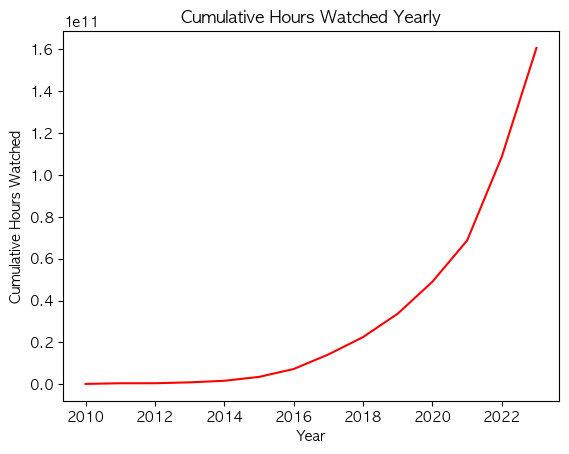

In [9]:
df_clean = df.dropna(subset=['release_date_parsed']) # Nat 제거

# year 추출
df_clean['release_year'] = df_clean['release_date_parsed'].dt.year

# Group by
yearly_hours = df_clean.groupby('release_year')['Hours Viewed'].sum()

# Calculate
cumulative_hours = yearly_hours.cumsum()

# Plotting
cumulative_hours.plot(kind='line', title='Cumulative Hours Watched Yearly', color='red')
plt.xlabel('Year')
plt.ylabel('Cumulative Hours Watched')
plt.show()

### 2.2. Group by Genre

In [23]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."


In [33]:
df['Genre'] = df['Genre'].replace('0', np.nan)
df['Genre'] = df['Genre'].dropna().astype(str).str.split(',')
print(df['Genre'].head())

0    [Biography,  Drama,  History]
1        [Comedy,  Drama, Romance]
2                          [Short]
3      [Drama,  History,  Romance]
4               [Comedy,  Romance]
Name: Genre, dtype: object


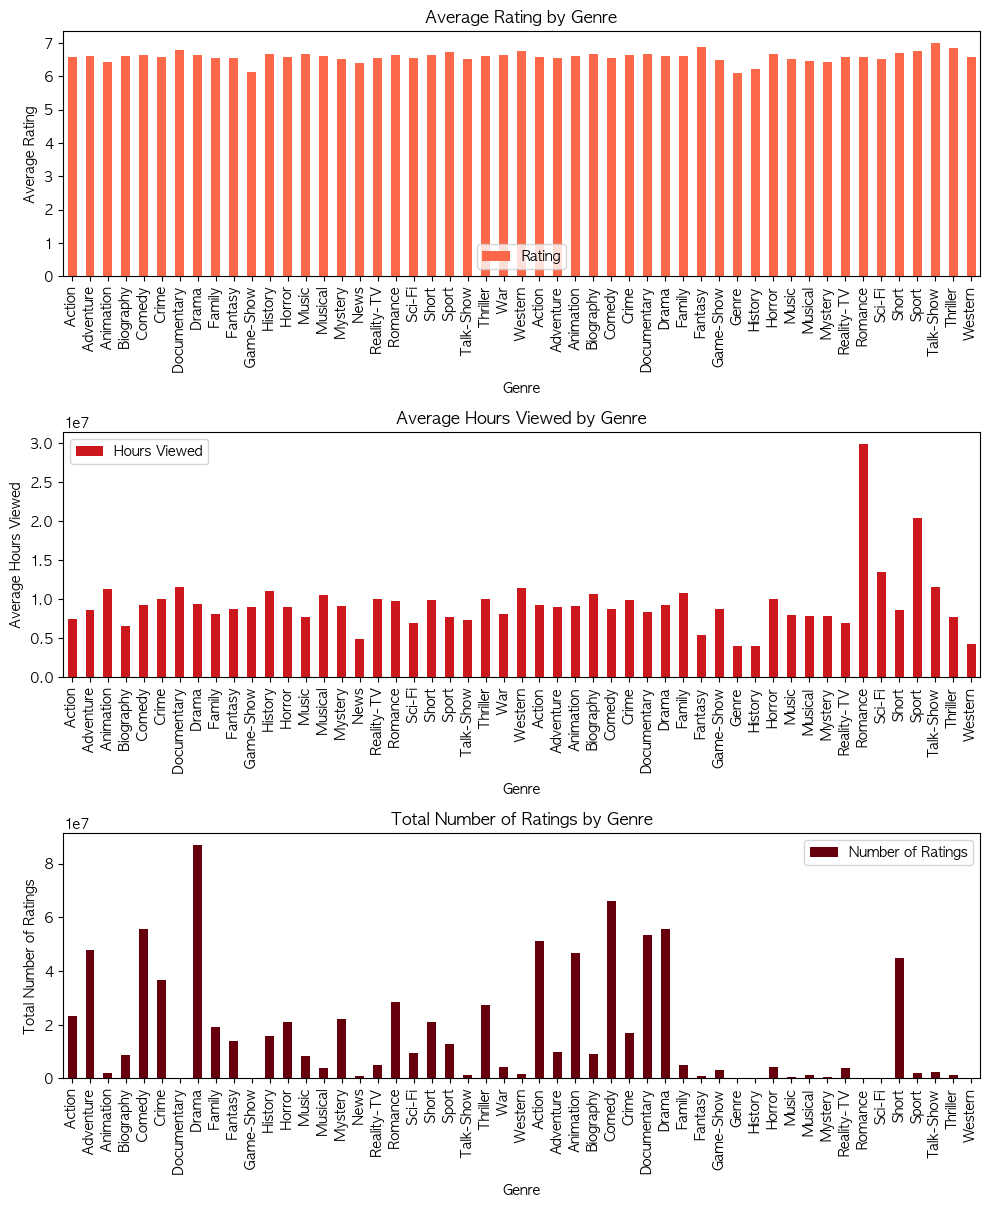

In [34]:
# Group by Genre
df_exploded = df.explode('Genre')
genre_stats = df_exploded.groupby('Genre').agg({'Rating': 'mean', 'Hours Viewed': 'mean', 'Number of Ratings': 'sum'})

# colormap 
cmap = plt.get_cmap('Reds')
bright_cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', cmap(np.linspace(0.5, 1, 256)))

# Plotting
axes = genre_stats.plot(kind='bar', subplots=True, layout=(4, 1), figsize=(10, 15), sharex=False, cmap=bright_cmap)

# subplots
axes[0][0].set_title('Average Rating by Genre')
axes[0][0].set_xlabel('Genre')
axes[0][0].set_ylabel('Average Rating')

axes[1][0].set_title('Average Hours Viewed by Genre')
axes[1][0].set_xlabel('Genre')
axes[1][0].set_ylabel('Average Hours Viewed')

axes[2][0].set_title('Total Number of Ratings by Genre')
axes[2][0].set_xlabel('Genre')
axes[2][0].set_ylabel('Total Number of Ratings')


plt.tight_layout()

# Display the plot
plt.show()

#### 2.2.1. Movie

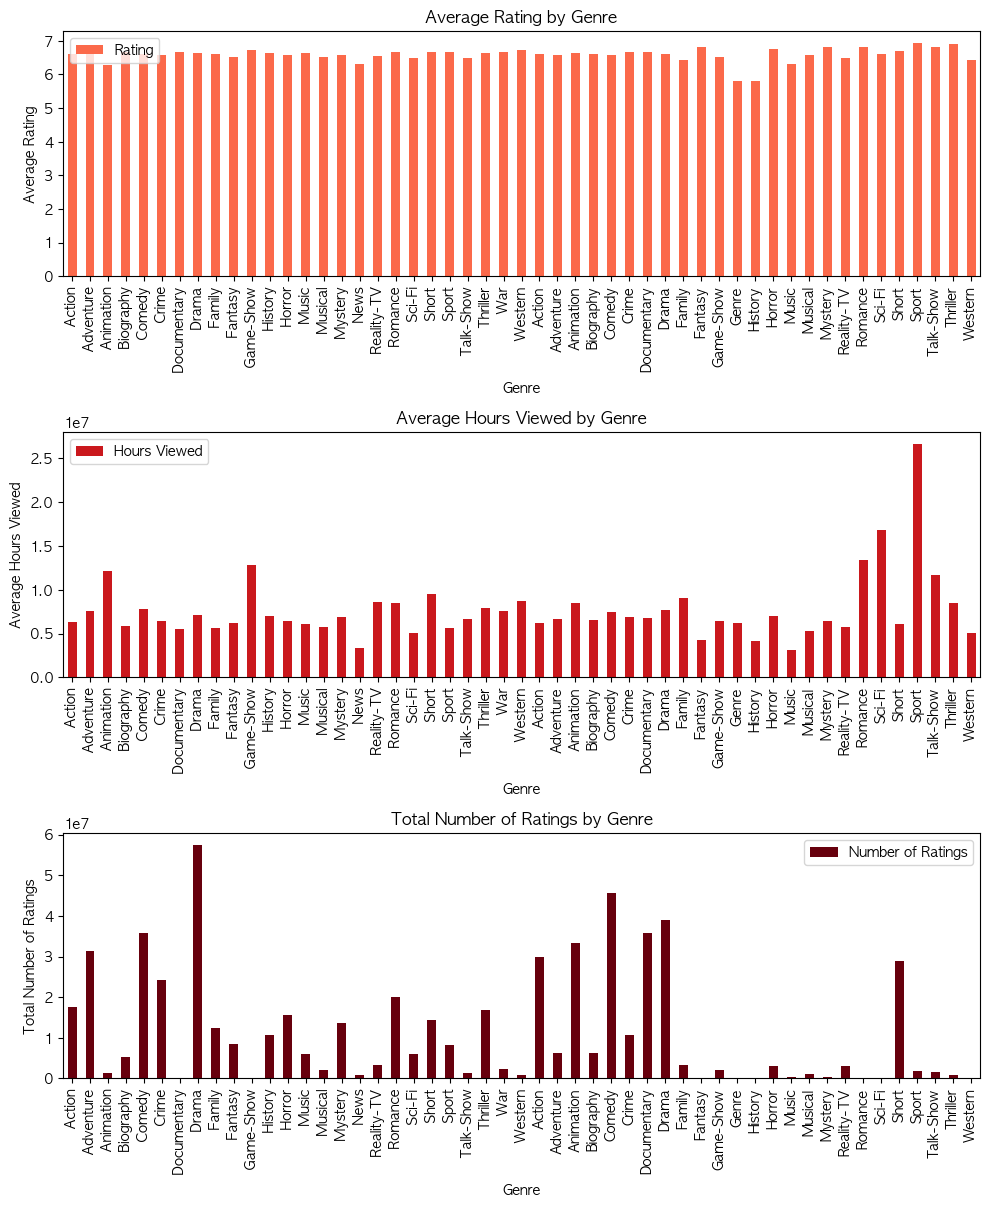

In [35]:
# 필터링
df_filtered = df[df['Type'] == 'Movie']

# Group by Genre
df_exploded = df_filtered.explode('Genre')
genre_stats = df_exploded.groupby('Genre').agg({'Rating': 'mean', 'Hours Viewed': 'mean', 'Number of Ratings': 'sum'})

# Get the colormap and adjust its brightness
cmap = plt.get_cmap('Reds')
bright_cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', cmap(np.linspace(0.5, 1, 256)))

# Plotting
axes = genre_stats.plot(kind='bar', subplots=True, layout=(4, 1), figsize=(10, 15), sharex=False, cmap=bright_cmap)

# Set individual titles and labels for each subplot
axes[0][0].set_title('Average Rating by Genre')
axes[0][0].set_xlabel('Genre')
axes[0][0].set_ylabel('Average Rating')

axes[1][0].set_title('Average Hours Viewed by Genre')
axes[1][0].set_xlabel('Genre')
axes[1][0].set_ylabel('Average Hours Viewed')

axes[2][0].set_title('Total Number of Ratings by Genre')
axes[2][0].set_xlabel('Genre')
axes[2][0].set_ylabel('Total Number of Ratings')

plt.tight_layout()

# Display the plot
plt.show()


#### 2.2.2. TV Show

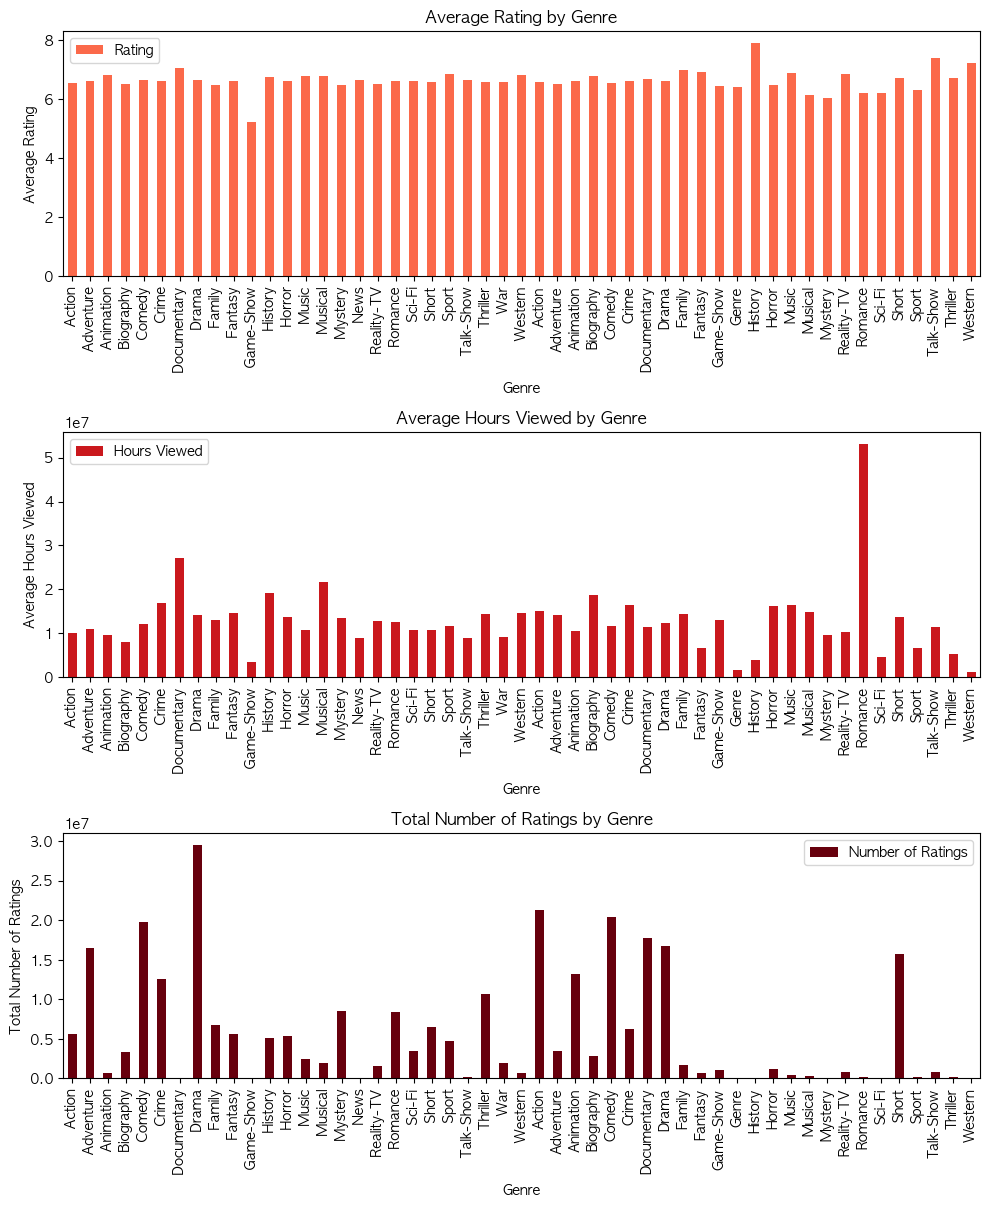

In [36]:
# 필터링
df_filtered = df[df['Type'] == 'TV Show']

# Group by Genre
df_exploded = df_filtered.explode('Genre')
genre_stats = df_exploded.groupby('Genre').agg({'Rating': 'mean', 'Hours Viewed': 'mean', 'Number of Ratings': 'sum'})

# Get the colormap and adjust its brightness
cmap = plt.get_cmap('Reds')
bright_cmap = mcolors.LinearSegmentedColormap.from_list('bright_cmap', cmap(np.linspace(0.5, 1, 256)))

# Plotting
axes = genre_stats.plot(kind='bar', subplots=True, layout=(4, 1), figsize=(10, 15), sharex=False, cmap=bright_cmap)

# Set individual titles and labels for each subplot
axes[0][0].set_title('Average Rating by Genre')
axes[0][0].set_xlabel('Genre')
axes[0][0].set_ylabel('Average Rating')

axes[1][0].set_title('Average Hours Viewed by Genre')
axes[1][0].set_xlabel('Genre')
axes[1][0].set_ylabel('Average Hours Viewed')

axes[2][0].set_title('Total Number of Ratings by Genre')
axes[2][0].set_xlabel('Genre')
axes[2][0].set_ylabel('Total Number of Ratings')

plt.tight_layout()

# Display the plot
plt.show()


In [21]:
df_exploded.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,Type,release_date_parsed
0,The Night Agent: Season 1,1,2023-03-23,812100000.0,7696.0,6.0,Biography,"persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,TV Show,2023-03-23
0,The Night Agent: Season 1,1,2023-03-23,812100000.0,7696.0,6.0,Drama,"persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,TV Show,2023-03-23
0,The Night Agent: Season 1,1,2023-03-23,812100000.0,7696.0,6.0,History,"persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,TV Show,2023-03-23
1,Ginny & Georgia: Season 2,1,2023-01-05,665100000.0,5216.0,5.7,Comedy,"producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",TV Show,2023-01-05
1,Ginny & Georgia: Season 2,1,2023-01-05,665100000.0,5216.0,5.7,Drama,"producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",TV Show,2023-01-05


### 2.3. Correlation

In [14]:
# Convert 'Available Globally?' to a binary numeric column 
df_exploded['Available Globally?'] = df_exploded['Available Globally?'].map({'Yes': 1, 'No': 0})

# Group by 'Genre' and calculate the sum of 'hours viewed' and the mean of 'Available Globally?'
genre_popularity = df_exploded.groupby('Genre').agg({'Hours Viewed': 'sum', 'Available Globally?': 'mean'})

# Now calculate the correlation
correlation = genre_popularity.corr()

# Display the correlation matrix
display(correlation)

,Hours Viewed,Available Globally?
Hours Viewed,1.000000,0.195908
Available Globally?,0.195908,1.000000


In [19]:
# Group the data by 'Genre'
grouped = df_exploded.groupby('Genre')

# Define a function to calculate the correlation for each group
def calculate_correlation(group):
    return group['Hours Viewed'].corr(group['Available Globally?'])

# Apply the function to each genre group
genre_correlation = grouped.apply(calculate_correlation)

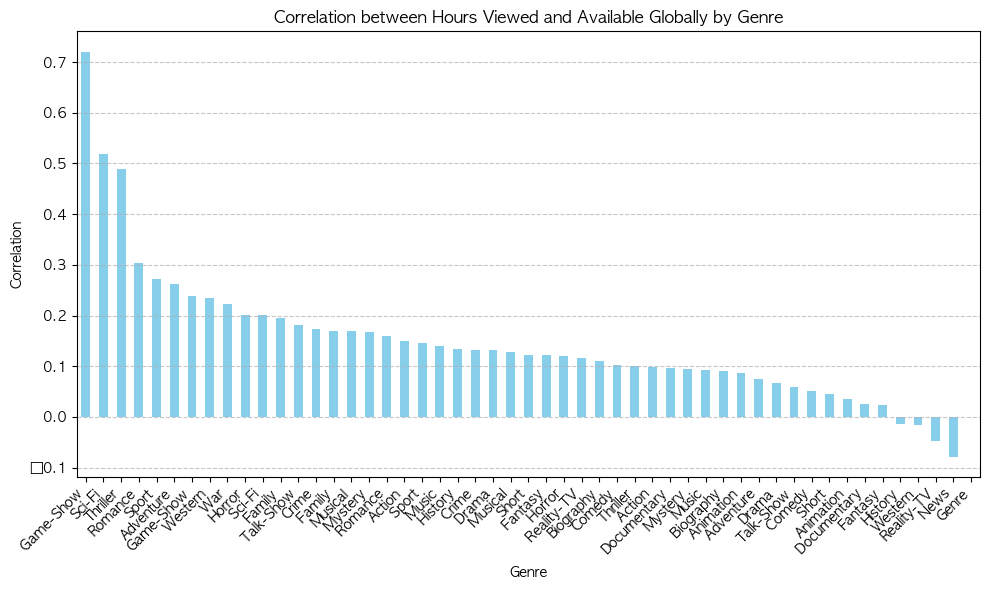

In [20]:
# 새로운 figure와 axis 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 상관 관계를 시각화
genre_correlation.sort_values(ascending=False).plot(kind='bar', color='skyblue', ax=ax)

# 그래프 타이틀과 레이블 설정
ax.set_title('Correlation between Hours Viewed and Available Globally by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Correlation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 표시
plt.show()


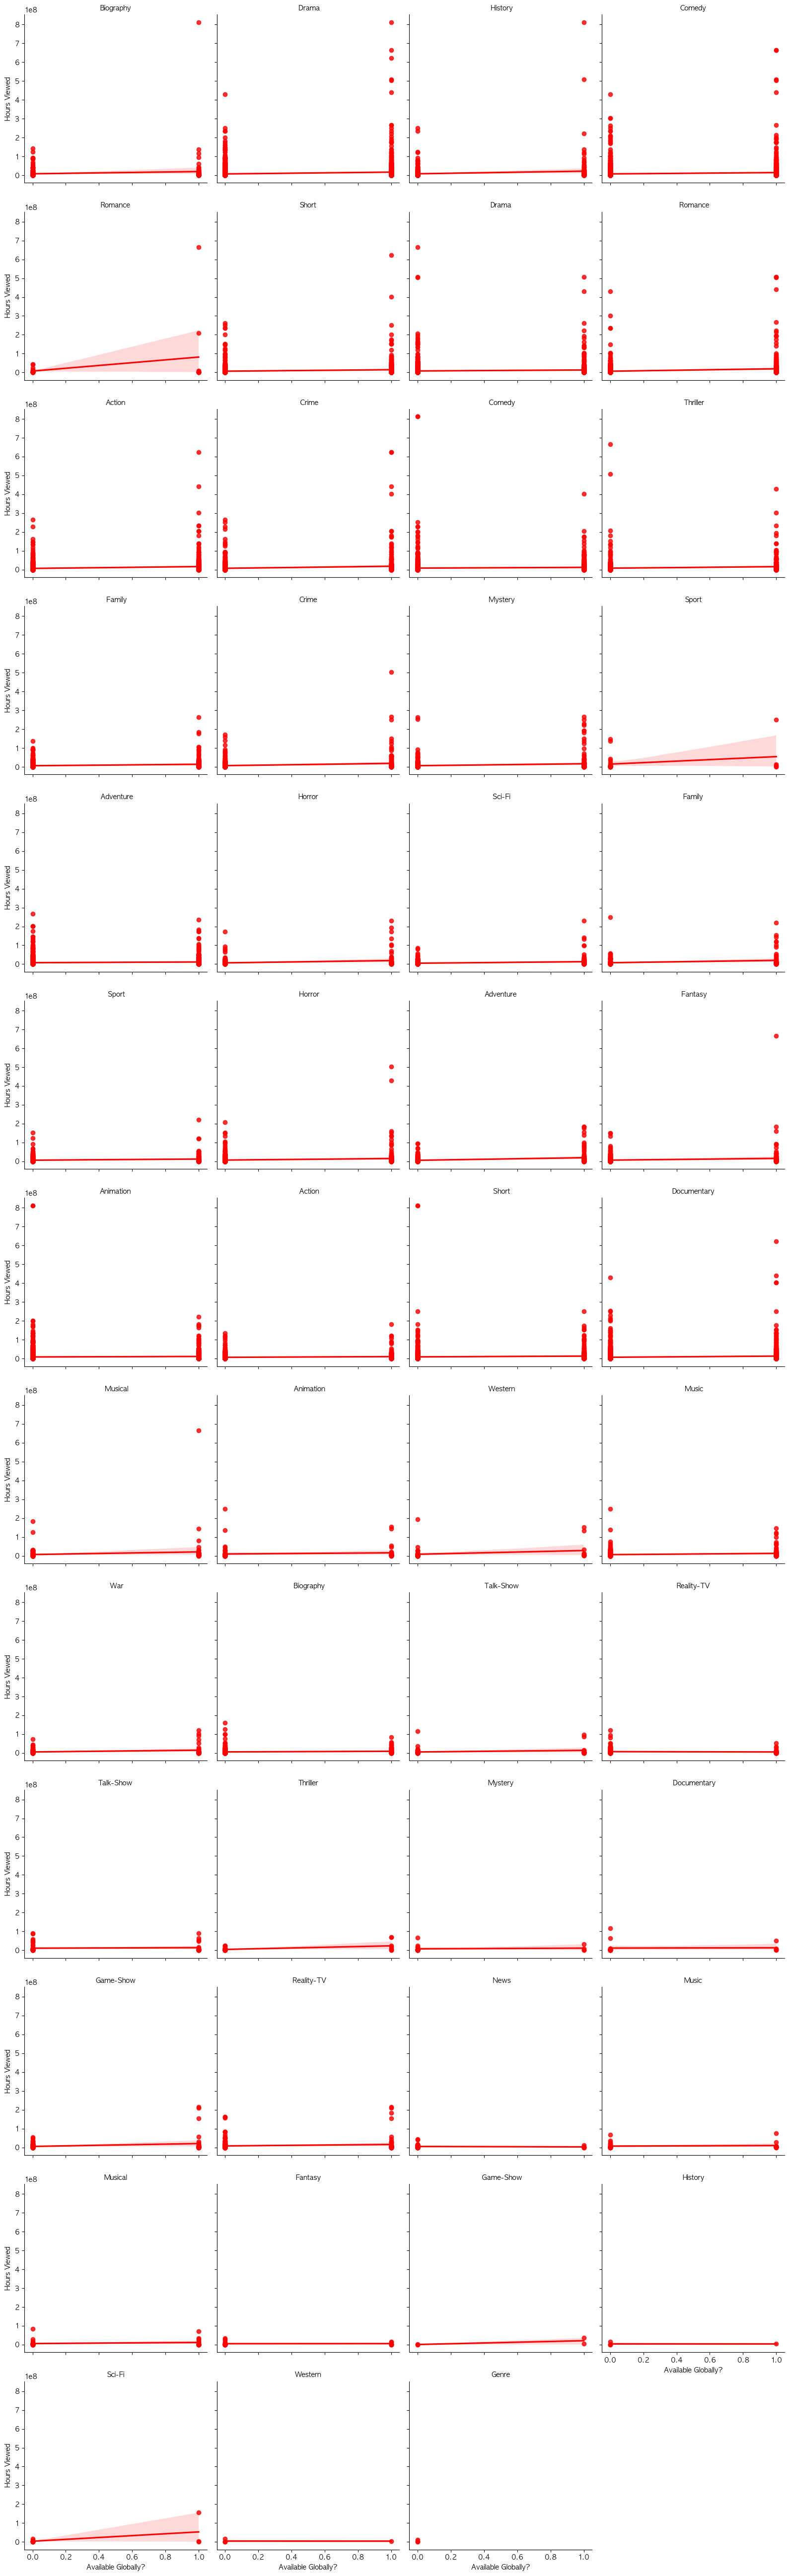

In [17]:
# Set up a FacetGrid to plot multiple genres
g = sns.FacetGrid(df_exploded, col='Genre', col_wrap=4, height=4, aspect=1)

#FacetGrid
g.map(sns.regplot, 'Available Globally?', 'Hours Viewed', color='red')

# Set up titles
g.set_titles("{col_name}")

# Show the plots
plt.tight_layout()
plt.show()